In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train = np.load("/content/drive/MyDrive/ML/HW4/x_train.npy")
y_train = np.load("/content/drive/MyDrive/ML/HW4/y_train.npy")
x_test = np.load("/content/drive/MyDrive/ML/HW4/x_test.npy")
# y_test = np.load("y_test.npy")

In [ ]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [ ]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [ ]:
seed = 10

def cross_validation(x_train, y_train, k=5):
  n_samples = x_train.shape[0]
  n_splits = k
  indices = np.arange(n_samples)
  np.random.seed(seed)
  np.random.shuffle(indices)
  print(indices)

  fold_sizes = (n_samples // n_splits) * np.ones(n_splits, dtype=np.int)
  fold_sizes[:n_samples % n_splits] += 1
  # print(fold_sizes)
  idx = []
  current = 0
  for fold_size in fold_sizes:
    start, stop = current, current + fold_size
    train_idx = np.concatenate([indices[:start], indices[stop:]])
    val_idx = indices[start:stop]
    idx.append([train_idx, val_idx])
    current = stop
  
  return idx

# print(cross_validation(x_train, y_train, k=10))

In [ ]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [ ]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 1  2  3  4  5  6  7  8  9 10 12 13 14 15 17 19], Validation index: [ 0 11 16 18]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7  8 10 11 13 15 16 17 18], Validation index: [ 9 12 14 19]
Split: 3, Training index: [ 0  1  2  4  5  7  9 11 12 13 14 15 16 17 18 19], Validation index: [ 3  6  8 10]
Split: 4, Training index: [ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 18 19], Validation index: [ 4  7 15 17]
Split: 5, Training index: [ 0  3  4  6  7  8  9 10 11 12 14 15 16 17 18 19], Validation index: [ 1  2  5 13]


In [ ]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [ ]:
kfold_data = cross_validation(x_train, y_train, k=5)

[ 149 5282 6571 ... 1344 4623 1289]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
## your code
_c = [0.01, 0.1, 1, 10, 100]
_gamma = [0.0001, 0.001, 0.01, 1, 10]

classifiers = []
best_score = 0
scores = []

for c in _c:
  temp = []
  for g in _gamma:
    total = 0
    score = 0
    for train_idx, val_idx in kfold_data:
      # print(train_idx.shape, val_idx.shape)
      clf = SVC(C=c, kernel='rbf', gamma=g)
      clf.fit(x_train[train_idx], y_train[train_idx])
      y_pred = clf.predict(x_train[val_idx])
      total += accuracy_score(y_train[val_idx], y_pred)

    classifiers.append((clf, c, g))
    score = total / len(kfold_data)
    temp.append(score)

    # print(f'C: {c}, gamma: {g}, acc: {score}')
    if score > best_score:
      best_score = score
      best_parameters = [c, g]
  
  scores.append(temp)

C: 0.01, gamma: 0.0001, acc: 0.4914285714285714
C: 0.01, gamma: 0.001, acc: 0.4914285714285714
C: 0.01, gamma: 0.01, acc: 0.4914285714285714
C: 0.01, gamma: 1, acc: 0.4914285714285714
C: 0.01, gamma: 10, acc: 0.4914285714285714
C: 0.1, gamma: 0.0001, acc: 0.9741428571428571
C: 0.1, gamma: 0.001, acc: 0.4914285714285714
C: 0.1, gamma: 0.01, acc: 0.4914285714285714
C: 0.1, gamma: 1, acc: 0.4914285714285714
C: 0.1, gamma: 10, acc: 0.4914285714285714
C: 1, gamma: 0.0001, acc: 0.9934285714285714
C: 1, gamma: 0.001, acc: 0.4914285714285714
C: 1, gamma: 0.01, acc: 0.4914285714285714
C: 1, gamma: 1, acc: 0.4914285714285714
C: 1, gamma: 10, acc: 0.4914285714285714
C: 10, gamma: 0.0001, acc: 0.9934285714285714
C: 10, gamma: 0.001, acc: 0.4914285714285714
C: 10, gamma: 0.01, acc: 0.4914285714285714
C: 10, gamma: 1, acc: 0.4914285714285714
C: 10, gamma: 10, acc: 0.4914285714285714
C: 100, gamma: 0.0001, acc: 0.9934285714285714
C: 100, gamma: 0.001, acc: 0.4914285714285714
C: 100, gamma: 0.01, acc:

In [ ]:
print(best_parameters)

[1, 0.0001]


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(scores)

[[0.4914285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714], [0.9741428571428571, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714], [0.9934285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714], [0.9934285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714], [0.9934285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714, 0.4914285714285714]]


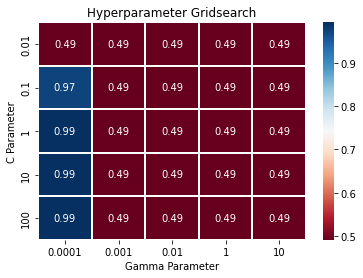

In [ ]:
# plt.figure(figsize=(15, 10))
sns.heatmap(scores,
      annot=True,
      xticklabels=_gamma,
      yticklabels=_c,
      linewidths=1.0,
      cmap='RdBu',
      cbar=True)
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
plt.title("Hyperparameter Gridsearch")
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [ ]:
C, gamma = best_parameters
print(C, gamma)
best_model = SVC(C=C, kernel='rbf', gamma=gamma)
best_model.fit(x_train, y_train)

1 0.0001


SVC(C=1, gamma=0.0001)

In [ ]:
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))